In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors

In [2]:
def fix_grid(ds):
    grid=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5/gridfiles/CM2.6_grid_spec.nc')[['geolat_t', 'geolon_t']]
    grid=grid.rename({'gridlat_t': 'yt_ocean', 'gridlon_t':'xt_ocean'})
    glat=grid.geolat_t.interp_like(ds)
    glon=grid.geolon_t.interp_like(ds)
    ds=ds.assign_coords({'geolat_t':glat, 'geolon_t': glon})
    return ds

In [3]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181/'
raw='/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5/control/'
ssh=xr.open_dataset(raw+'01810101.ice_daily.nc')
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_daily.nc')
ds=xr.open_dataset(raw+'01810101.ocean_minibling_surf_field.nc')
temp=xr.open_dataset(raw+'01810101.ocean_minibling_field_temp.nc').temp
dic=xr.open_dataset(raw+'01810101.ocean_minibling_field_dic.nc').dic
salt=xr.open_dataset(raw+'01810101.ocean_minibling_field_salt.nc').salt
o2=xr.open_dataset(raw+'01810101.ocean_minibling_field_o2.nc').o2
u=xr.open_dataset(raw+'01810101.ocean_minibling_field_u.nc').u
v=xr.open_dataset(raw+'01810101.ocean_minibling_field_v.nc').v
flux=xr.open_dataset(raw+'01810101.ocean_minibling_surf_flux.nc')

In [4]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
ds_corr=xr.open_dataset(pathf+'3x3box_corr_monthly_0181-0190.nc')

In [5]:
savepath='/gxfs_home/geomar/smomw577/plots/regions/'

# select regions

From correlation map I select two neighbouring regions with a different sign between SSH and CO2 and pick out three eddies out of each region. 

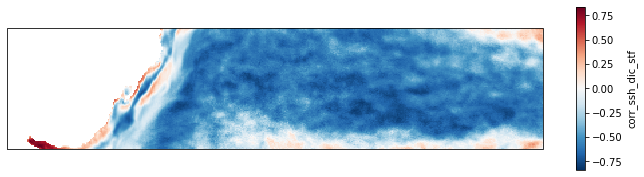

In [134]:
correg=ds_corr.corr_ssh_dic_stf.sel(xt_ocean=slice(-60,-20)).sel(yt_ocean=slice(-35,-26))
fig, axs=plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,3))
correg.plot(transform = ccrs.PlateCarree())
plt.savefig(savepath+'blue.png', dpi=200)

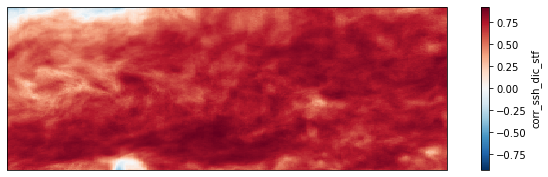

In [135]:
correg=ds_corr.corr_ssh_dic_stf.sel(xt_ocean=slice(-47,-20)).sel(yt_ocean=slice(-50,-40))
fig, axs=plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,3))
correg.plot(transform = ccrs.PlateCarree())
plt.savefig(savepath+'red.png', dpi=200)

# find eddies (at least 3 cyclonic, and 3 anticyclonic)

## blue region

In [69]:
blue=dsa.sel(xt_ocean=slice(-60,-20)).sel(yt_ocean=slice(-35,-26))

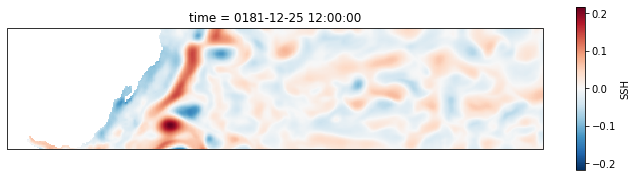

In [323]:
fig, axs=plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,3))
blue.SSH.isel(time=358).plot(transform = ccrs.PlateCarree())

### cyclonic eddies

In [300]:
reg1=blue.isel(time=12).sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=slice(-34.1,-31.5))
reg2=blue.isel(time=357).sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=slice(-34.3,-32.1))
reg3=blue.isel(time=222).sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=slice(-33,-30.6))

In [301]:
center1=reg1.SSH.where(reg1.SSH==reg1.SSH.max(), drop=True)
center2=reg2.SSH.where(reg2.SSH==reg2.SSH.max(), drop=True)
center3=reg3.SSH.where(reg3.SSH==reg3.SSH.max(), drop=True)

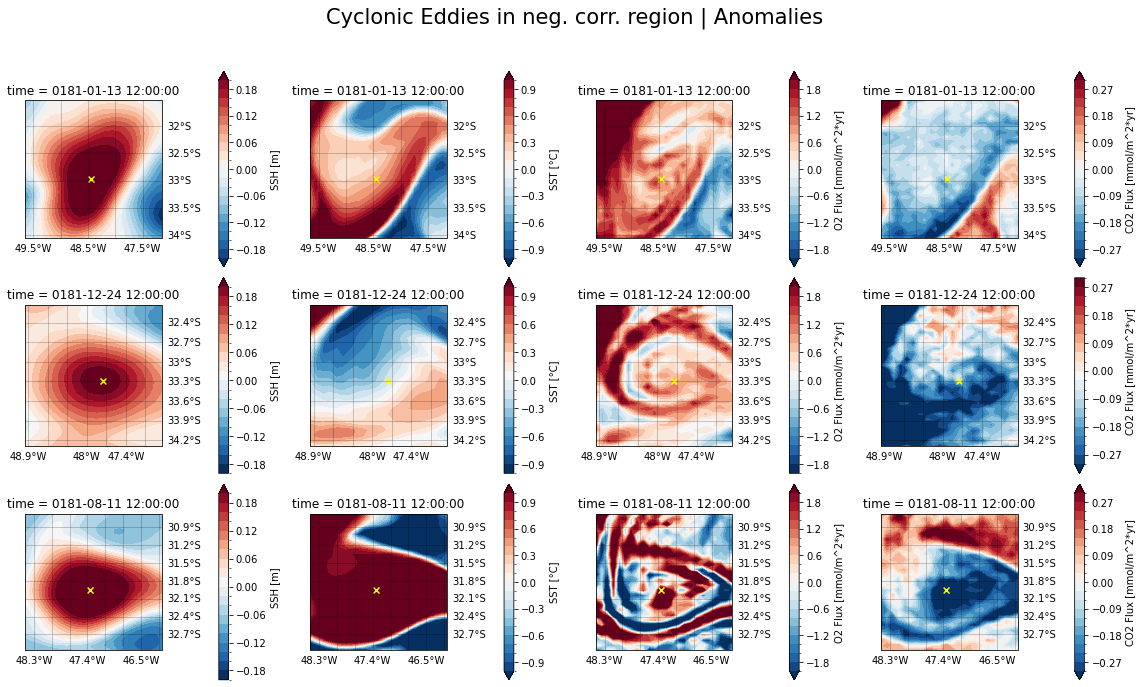

In [305]:

fig, axs=plt.subplots(nrows=3, ncols=4,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,10))
axs=axs.flatten()
###SSH
reg1.SSH.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg2.SSH.plot.contourf(ax=axs[4],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg3.SSH.plot.contourf(ax=axs[8],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
###SST
reg1.SST.plot.contourf(ax=axs[1],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg2.SST.plot.contourf(ax=axs[5],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg3.SST.plot.contourf(ax=axs[9],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))


###O2
reg1.o2_stf.plot.contourf(ax=axs[2],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-2,2,21))
reg2.o2_stf.plot.contourf(ax=axs[6],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-2,2,21))
reg3.o2_stf.plot.contourf(ax=axs[10],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-2,2,21))

###CO2
reg1.dic_stf.plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.3,.3,21))
reg2.dic_stf.plot.contourf(ax=axs[7],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.3,.3,21))
reg3.dic_stf.plot.contourf(ax=axs[11],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.3,.3,21))

for i in range(12):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
    gl.xlabels_top = False
    gl.ylabels_left = False
    if i in [0,1,2,3]:
        axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [4,5,6,7]:
        axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [8,9,10,11]:
        axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
    
plt.suptitle('Cyclonic Eddies in neg. corr. region | Anomalies', fontsize=21);
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_cyc_anom.png', dpi=300);

In [303]:
abs1=ds.isel(time=12).sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=slice(-34.1,-31.5)).sel(xu_ocean=slice(-49.7,-47.1)).sel(yu_ocean=slice(-34.1,-31.5))
abs2=ds.isel(time=357).sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=slice(-34.3,-32.1)).sel(xu_ocean=slice(-49,-46.8)).sel(yu_ocean=slice(-34.3,-32.1))
abs3=ds.isel(time=222).sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=slice(-33,-30.6)).sel(xu_ocean=slice(-48.5,-46.1)).sel(yu_ocean=slice(-33,-30.6))

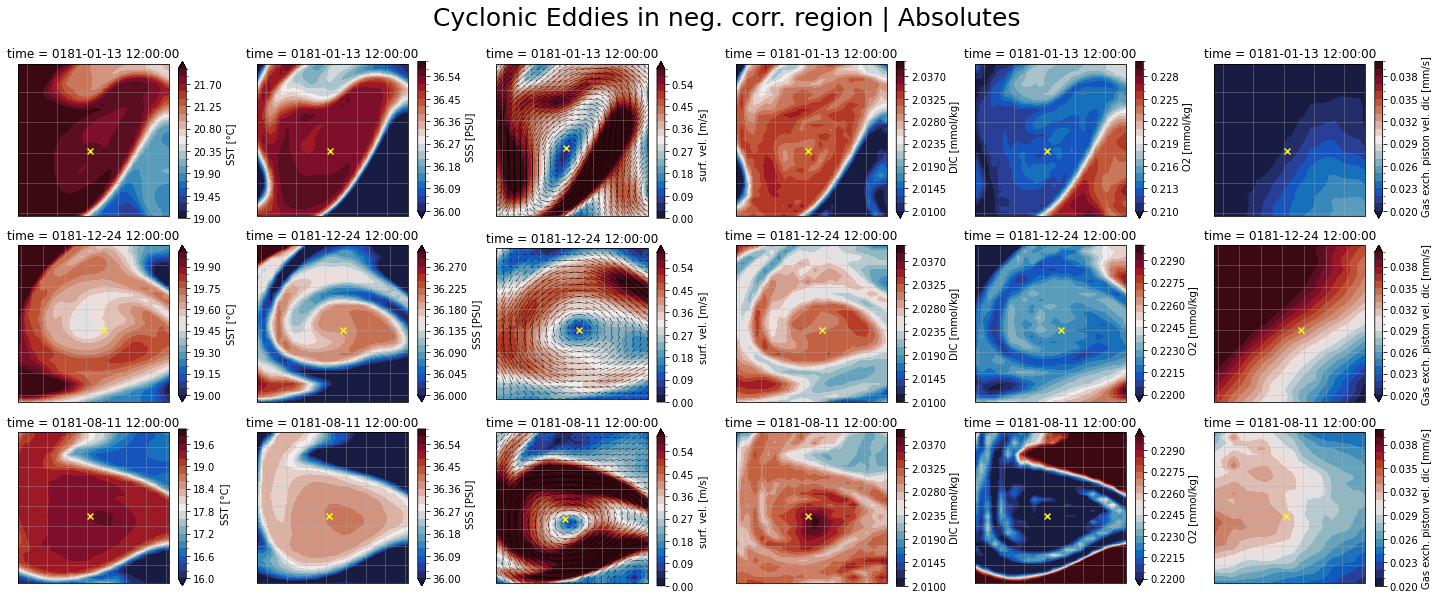

In [304]:
fig, axs=plt.subplots(nrows=3, ncols=6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,9))
axs=axs.flatten()
###SSH
abs1.surface_temp.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(19,22,21))
abs2.surface_temp.plot.contourf(ax=axs[6], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(19,20,21))
abs3.surface_temp.plot.contourf(ax=axs[12], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(16,20,21))

abs1.surface_salt.plot.contourf(ax=axs[1], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(36,36.6,21))
abs2.surface_salt.plot.contourf(ax=axs[7], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(36,36.3,21))
abs3.surface_salt.plot.contourf(ax=axs[13], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(36,36.6,21))

(np.sqrt(abs1.usurf**2+abs1.vsurf**2)).plot.contourf(ax=axs[2], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,.6,21))
(np.sqrt(abs2.usurf**2+abs2.vsurf**2)).plot.contourf(ax=axs[8], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,.6,21))
(np.sqrt(abs3.usurf**2+abs3.vsurf**2)).plot.contourf(ax=axs[14], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance,levels=np.linspace(0,.6,21))

abs1.plot.quiver(ax=axs[2], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs2.plot.quiver(ax=axs[8], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs3.plot.quiver(ax=axs[14], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(), add_guide=False, scale=5)

(abs1.dic*1000).plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.01,2.04,21))
(abs2.dic*1000).plot.contourf(ax=axs[9], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.01,2.04,21))
(abs3.dic*1000).plot.contourf(ax=axs[15], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.01,2.04,21))

(abs1.o2*1000).plot.contourf(ax=axs[4], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.23,21))
(abs2.o2*1000).plot.contourf(ax=axs[10], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.22,.23,21))
(abs3.o2*1000).plot.contourf(ax=axs[16], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.22,.23,21))

(abs1.kw*1000).plot.contourf(ax=axs[5], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.02,.04,21))
(abs2.kw*1000).plot.contourf(ax=axs[11], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance,levels=np.linspace(.02,.04,21))
(abs3.kw*1000).plot.contourf(ax=axs[17], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.02,.04,21))
for i in range(18):
    axs[i].gridlines(alpha=0.4)
    if i in [0,1,2,3,4,5]:
            axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [6,7,8,9,10,11]:
            axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [12,13,14,15,16,17]:
            axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
plt.suptitle('Cyclonic Eddies in neg. corr. region | Absolutes', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_cyc_abs.png', dpi=300)

In [357]:
dict1=dic.sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt1=temp.sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt1=salt.sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t1=o2.sel(xt_ocean=slice(-49.7,-47.1)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt1=v.sel(xu_ocean=slice(-49.7,-47.1)).sel(yu_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict2=dic.sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=71).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt2=temp.sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=71).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt2=salt.sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=71).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t2=o2.sel(xt_ocean=slice(-49,-46.8)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=71).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt2=v.sel(xu_ocean=slice(-49,-46.8)).sel(yu_ocean=center2.yt_ocean.values, method='nearest').isel(time=71).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict3=dic.sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt3=temp.sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt3=salt.sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t3=o2.sel(xt_ocean=slice(-48.5,-46.1)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt3=v.sel(xu_ocean=slice(-48.5,-46.1)).sel(yu_ocean=center3.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

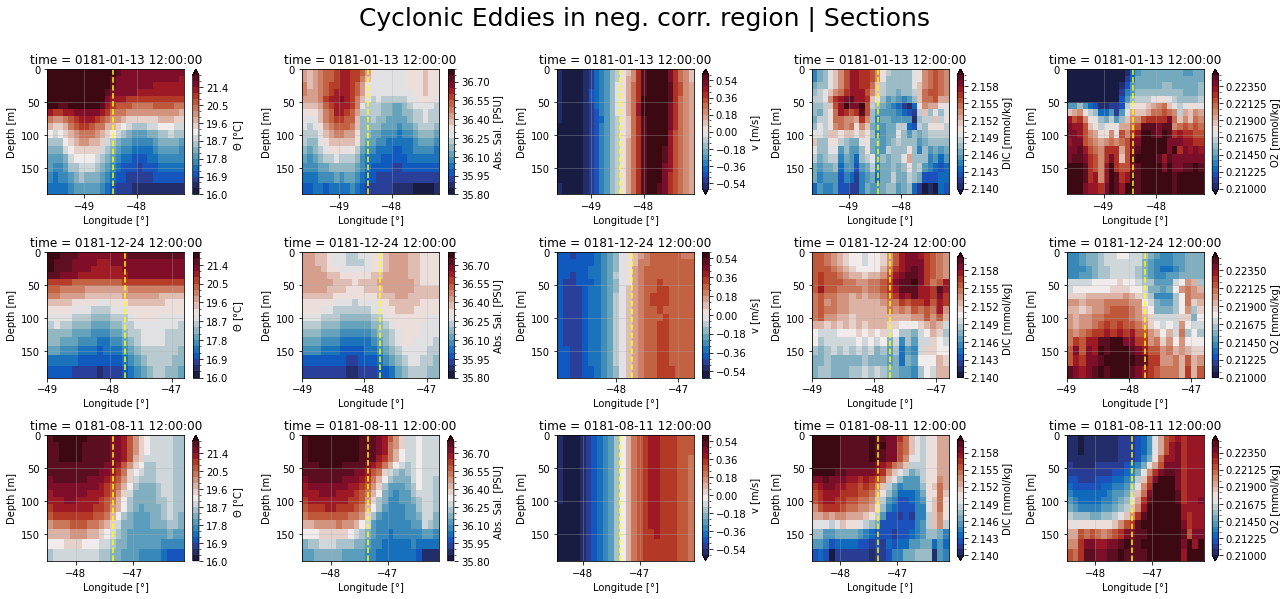

In [372]:
fig, axs=plt.subplots(nrows=3, ncols=5, figsize=(18,9))
axs=axs.flatten()

tempt1.plot(ax=axs[0], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,22,21), yincrease=False)
tempt2.plot(ax=axs[5], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,22,21), yincrease=False)
tempt3.plot(ax=axs[10],cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,22,21), yincrease=False)

saltt1.plot(ax=axs[1], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.8,21), yincrease=False)
saltt2.plot(ax=axs[6], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.8,21), yincrease=False)
saltt3.plot(ax=axs[11],cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.8,21), yincrease=False)

vt1.plot(ax=axs[2], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt2.plot(ax=axs[7], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt3.plot(ax=axs[12],cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance,levels=np.linspace(-.6,.6,21), yincrease=False)

(dict1*1000).plot(ax=axs[3] ,cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance,levels=np.linspace(2.14,2.16,21), yincrease=False)
(dict2*1000).plot(ax=axs[8] ,cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.14,2.16,21), yincrease=False)
(dict3*1000).plot(ax=axs[13],cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.14,2.16,21), yincrease=False)

                                                                                                                  
(o2t1*1000).plot(ax=axs[4], cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.225,21), yincrease=False)
(o2t2*1000).plot(ax=axs[9], cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.21,.225,21), yincrease=False)
(o2t3*1000).plot(ax=axs[14],cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.225,21), yincrease=False)
for i in range(15):
    axs[i].grid(alpha=0.4)
    axs[i].set_ylabel('Depth [m]')
    axs[i].set_xlabel('Longitude [°]')
    if i in [0,1,2,3,4]:
            axs[i].axvline(center1.xt_ocean,linestyle='--', c='yellow')
    if i in [5,6,7,8,9]:
            axs[i].axvline(center2.xt_ocean, linestyle='--', c='yellow')
    if i in [10,11,12,13,14]:
            axs[i].axvline(center3.xt_ocean, linestyle='--', c='yellow')
plt.suptitle('Cyclonic Eddies in neg. corr. region | Sections', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_cyc_section.png', dpi=300)

### anticyclonic eddies

In [403]:
reg1=blue.isel(time=12).sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=slice(-34.4,-32.7))
reg2=dsa.isel(time=92).sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=slice(-35.9, -34))
reg3=dsa.isel(time=302).sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=slice(-36.8,-34.2))

In [404]:
center1=reg1.SSH.where(reg1.SSH==reg1.SSH.min(), drop=True)
center2=reg2.SSH.where(reg2.SSH==reg2.SSH.min(), drop=True)
center3=reg3.SSH.where(reg3.SSH==reg3.SSH.min(), drop=True)

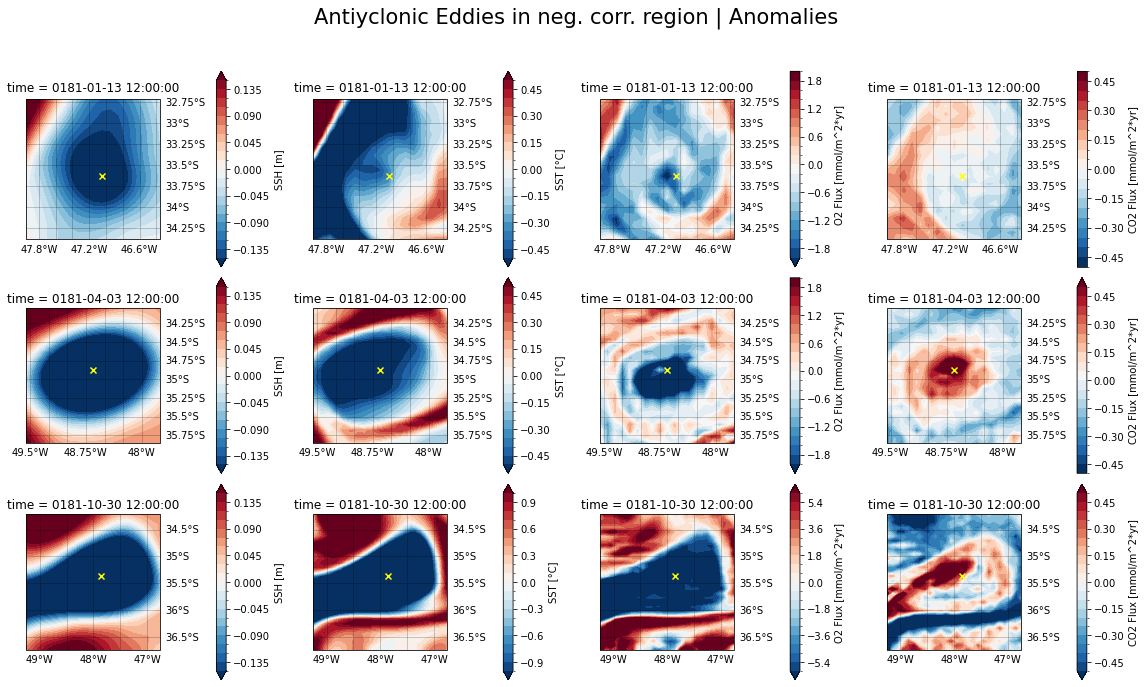

In [411]:

fig, axs=plt.subplots(nrows=3, ncols=4,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,10))
axs=axs.flatten()
###SSH
reg1.SSH.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.15,.15,21))
reg2.SSH.plot.contourf(ax=axs[4],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.15,.15,21))
reg3.SSH.plot.contourf(ax=axs[8],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.15,.15,21))
###SST
reg1.SST.plot.contourf(ax=axs[1],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-.5,.5,21))
reg2.SST.plot.contourf(ax=axs[5],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-.5,.5,21))
reg3.SST.plot.contourf(ax=axs[9],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))


###O2
reg1.o2_stf.plot.contourf(ax=axs[2],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-2,2,21))
reg2.o2_stf.plot.contourf(ax=axs[6],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-2,2,21))
reg3.o2_stf.plot.contourf(ax=axs[10],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))

###CO2
reg1.dic_stf.plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.5,.5,21))
reg2.dic_stf.plot.contourf(ax=axs[7],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.5,.5,21))
reg3.dic_stf.plot.contourf(ax=axs[11],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-.5,.5,21))

for i in range(12):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
    gl.xlabels_top = False
    gl.ylabels_left = False
    if i in [0,1,2,3]:
        axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [4,5,6,7]:
        axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [8,9,10,11]:
        axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
    
plt.suptitle('Antiyclonic Eddies in neg. corr. region | Anomalies', fontsize=21);
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_acyc_anom.png', dpi=300);

In [406]:
abs1=ds.isel(time=12 ).sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=slice(-34.4,-32.7)).sel(xu_ocean=slice(-48,-46.3)).sel(yu_ocean=slice(-34.4,-32.7))
abs2=ds.isel(time=92 ).sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=slice(-35.9, -34)).sel(xu_ocean=slice(-49.6,-47.7)).sel(yu_ocean=slice(-35.8, -34.1))
abs3=ds.isel(time=302).sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=slice(-36.8,-34.2)).sel(xu_ocean=slice(-49.3,-46.7)).sel(yu_ocean=slice(-36.7,-34.3))

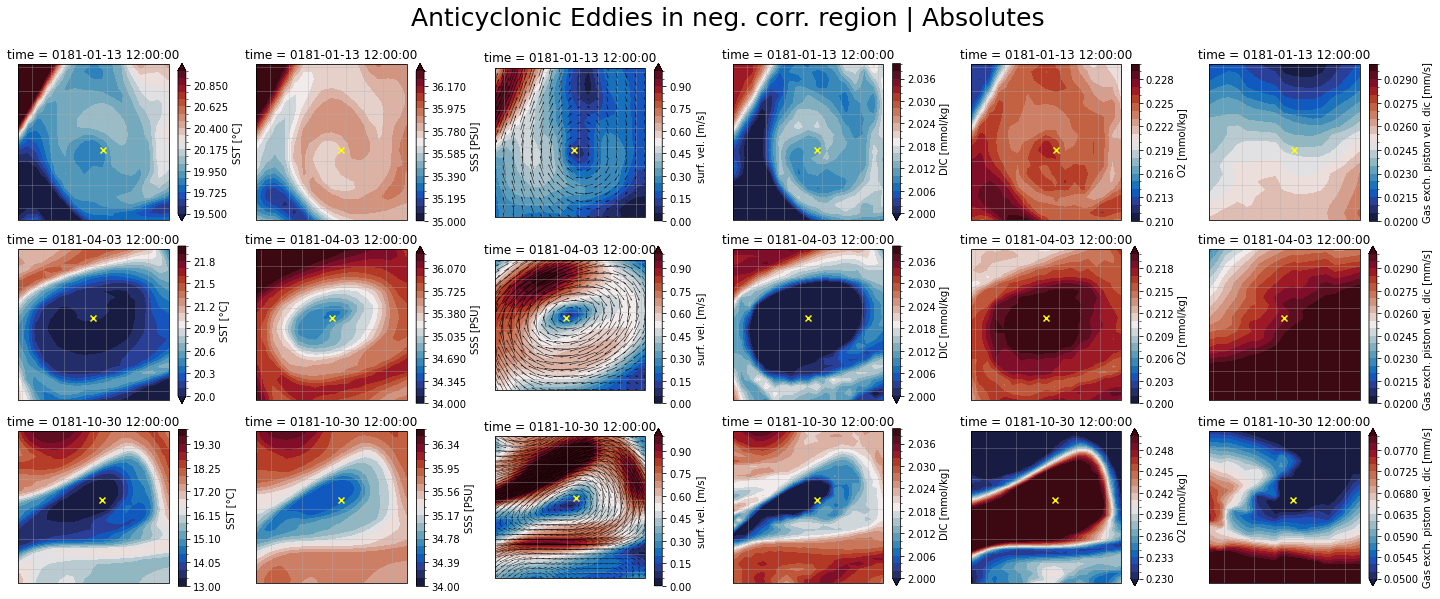

In [410]:
fig, axs=plt.subplots(nrows=3, ncols=6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,9))
axs=axs.flatten()
###SSH
abs1.surface_temp.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(19.5,21,21))
abs2.surface_temp.plot.contourf(ax=axs[6], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(20,22,21))
abs3.surface_temp.plot.contourf(ax=axs[12], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(13,20,21))

abs1.surface_salt.plot.contourf(ax=axs[1], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(35,36.3,21))
abs2.surface_salt.plot.contourf(ax=axs[7], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(34,36.3,21))
abs3.surface_salt.plot.contourf(ax=axs[13], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(34,36.6,21))

(np.sqrt(abs1.usurf**2+abs1.vsurf**2)).plot.contourf(ax=axs[2], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs2.usurf**2+abs2.vsurf**2)).plot.contourf(ax=axs[8], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs3.usurf**2+abs3.vsurf**2)).plot.contourf(ax=axs[14], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance,levels=np.linspace(0,1,21))

abs1.plot.quiver(ax=axs[2], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs2.plot.quiver(ax=axs[8], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs3.plot.quiver(ax=axs[14], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(), add_guide=False, scale=5)

(abs1.dic*1000).plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.0,2.04,21))
(abs2.dic*1000).plot.contourf(ax=axs[9], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.0,2.04,21))
(abs3.dic*1000).plot.contourf(ax=axs[15], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.0,2.04,21))

(abs1.o2*1000).plot.contourf(ax=axs[4], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.23,21))
(abs2.o2*1000).plot.contourf(ax=axs[10], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.20,.22,21))
(abs3.o2*1000).plot.contourf(ax=axs[16], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.23,.25,21))

(abs1.kw*1000).plot.contourf(ax=axs[5], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.02,.03,21))
(abs2.kw*1000).plot.contourf(ax=axs[11], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance,levels=np.linspace(.02,.03,21))
(abs3.kw*1000).plot.contourf(ax=axs[17], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.05,.08,21))
for i in range(18):
    axs[i].gridlines(alpha=0.4)
    if i in [0,1,2,3,4,5]:
            axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [6,7,8,9,10,11]:
            axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [12,13,14,15,16,17]:
            axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
plt.suptitle('Anticyclonic Eddies in neg. corr. region | Absolutes', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_acyc_abs.png', dpi=300)

In [401]:
dict1=dic.sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt1=temp.sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt1=salt.sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t1=o2.sel(xt_ocean=slice(-48,-46.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt1=v.sel(xu_ocean=slice(-48,-46.3)).sel(yu_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict2=dic.sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=18).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt2=temp.sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=18).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt2=salt.sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=18).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t2=o2.sel(xt_ocean=slice(-49.6,-47.7)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=18).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt2=v.sel(xu_ocean=slice(-49.6,-47.7)).sel(yu_ocean=center2.yt_ocean.values, method='nearest').isel(time=18).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict3=dic.sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=60).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt3=temp.sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=60).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt3=salt.sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=60).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t3=o2.sel(xt_ocean=slice(-49.3,-46.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=60).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt3=v.sel(xu_ocean=slice(-49.3,-46.7)).sel(yu_ocean=center3.yt_ocean.values, method='nearest').isel(time=60).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

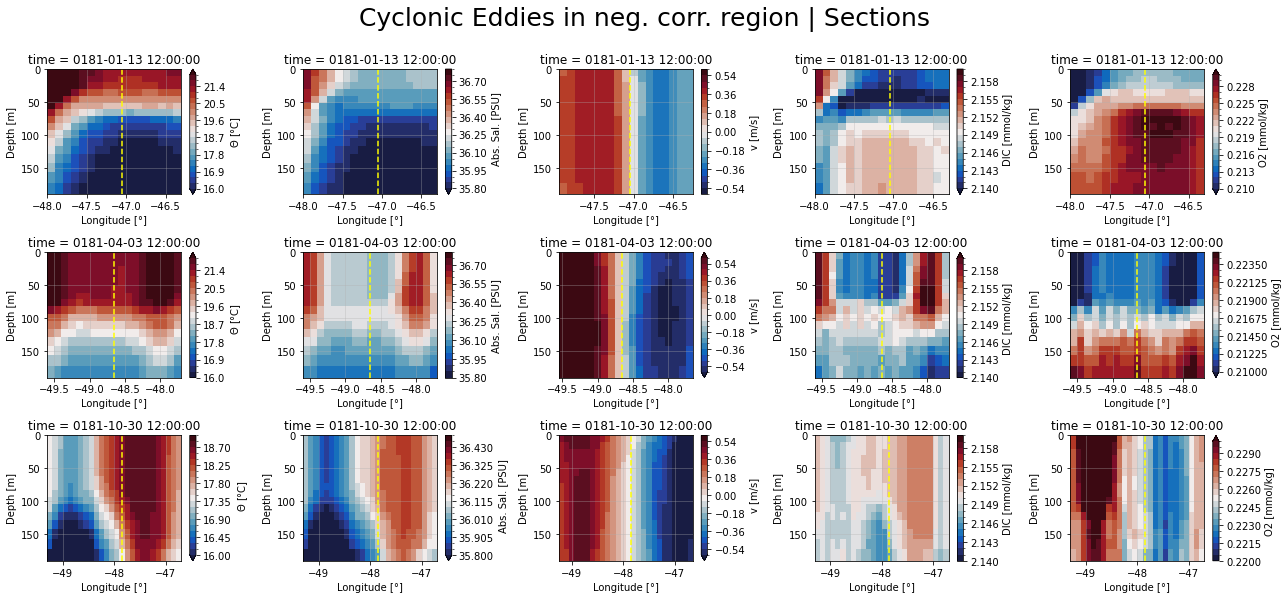

In [416]:
fig, axs=plt.subplots(nrows=3, ncols=5, figsize=(18,9))
axs=axs.flatten()

tempt1.plot(ax=axs[0], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,22,21), yincrease=False)
tempt2.plot(ax=axs[5], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,22,21), yincrease=False)
tempt3.plot(ax=axs[10],cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(16,19,21), yincrease=False)

saltt1.plot(ax=axs[1], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.8,21), yincrease=False)
saltt2.plot(ax=axs[6], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.8,21), yincrease=False)
saltt3.plot(ax=axs[11],cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35.8,36.5,21), yincrease=False)

vt1.plot(ax=axs[2], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt2.plot(ax=axs[7], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt3.plot(ax=axs[12],cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance,levels=np.linspace(-.6,.6,21), yincrease=False)

(dict1*1000).plot(ax=axs[3] ,cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance,levels=np.linspace(2.14,2.16,21), yincrease=False)
(dict2*1000).plot(ax=axs[8] ,cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.14,2.16,21), yincrease=False)
(dict3*1000).plot(ax=axs[13],cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.14,2.16,21), yincrease=False)

                                                                                                                  
(o2t1*1000).plot(ax=axs[4], cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.23,21), yincrease=False)
(o2t2*1000).plot(ax=axs[9], cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.21,.225,21), yincrease=False)
(o2t3*1000).plot(ax=axs[14],cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.22,.23,21), yincrease=False)
for i in range(15):
    axs[i].grid(alpha=0.4)
    axs[i].set_ylabel('Depth [m]')
    axs[i].set_xlabel('Longitude [°]')
    if i in [0,1,2,3,4]:
            axs[i].axvline(center1.xt_ocean,linestyle='--', c='yellow')
    if i in [5,6,7,8,9]:
            axs[i].axvline(center2.xt_ocean, linestyle='--', c='yellow')
    if i in [10,11,12,13,14]:
            axs[i].axvline(center3.xt_ocean, linestyle='--', c='yellow')
plt.suptitle('Cyclonic Eddies in neg. corr. region | Sections', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'negcorr_acyc_section.png', dpi=300)

## red region

In [417]:
red=dsa.sel(xt_ocean=slice(-47,-20)).sel(yt_ocean=slice(-50,-40))

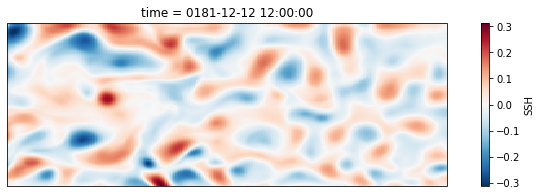

In [266]:
fig, axs=plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,3))
red.SSH.isel(time=345).plot(transform = ccrs.PlateCarree())

### cyclonic eddies

In [443]:
reg1=red.isel(time=12).sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=slice(-42.7,-40.3))
reg2=red.isel(time=82).sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=slice(-49.7,-47.7))
reg3=red.isel(time=122).sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=slice(-47.1,-44.8))

In [444]:
center1=reg1.SSH.where(reg1.SSH==reg1.SSH.max(), drop=True)
center2=reg2.SSH.where(reg2.SSH==reg2.SSH.max(), drop=True)
center3=reg3.SSH.where(reg3.SSH==reg3.SSH.max(), drop=True)

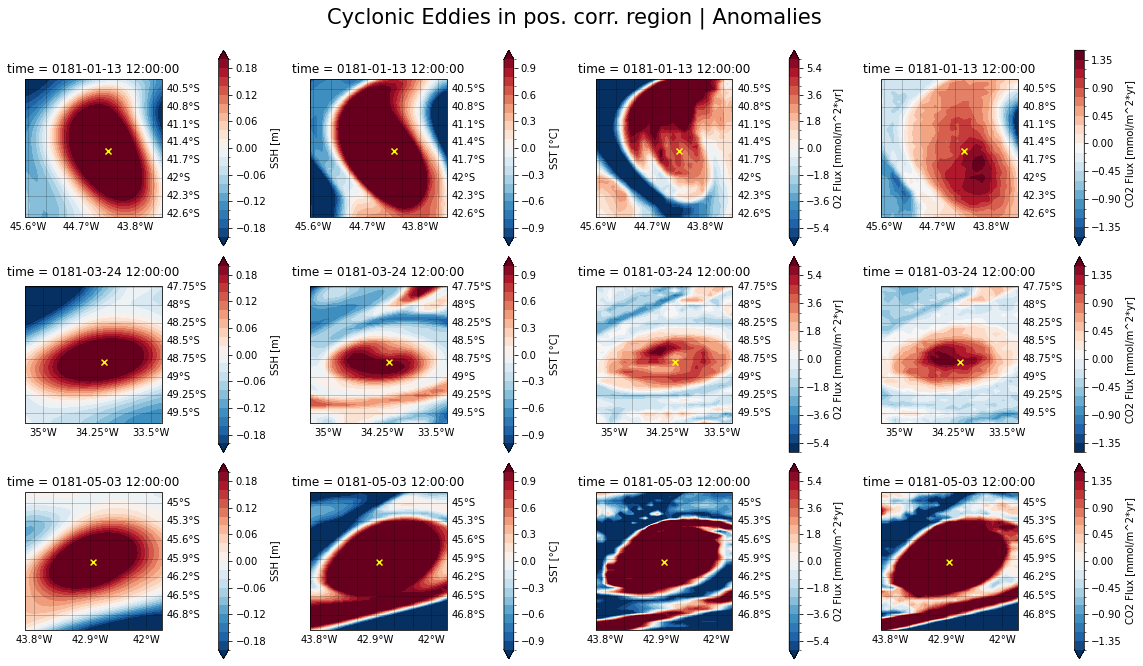

In [452]:

fig, axs=plt.subplots(nrows=3, ncols=4,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,10))
axs=axs.flatten()
###SSH
reg1.SSH.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg2.SSH.plot.contourf(ax=axs[4],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg3.SSH.plot.contourf(ax=axs[8],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
###SST
reg1.SST.plot.contourf(ax=axs[1],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg2.SST.plot.contourf(ax=axs[5],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg3.SST.plot.contourf(ax=axs[9],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))

###O2
reg1.o2_stf.plot.contourf(ax=axs[2],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))
reg2.o2_stf.plot.contourf(ax=axs[6],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))
reg3.o2_stf.plot.contourf(ax=axs[10],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))

###CO2
reg1.dic_stf.plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1.5,1.5,21))
reg2.dic_stf.plot.contourf(ax=axs[7],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1.5,1.5,21))
reg3.dic_stf.plot.contourf(ax=axs[11],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1.5,1.5,21))

for i in range(12):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
    gl.xlabels_top = False
    gl.ylabels_left = False
    if i in [0,1,2,3]:
        axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [4,5,6,7]:
        axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [8,9,10,11]:
        axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
    
plt.suptitle('Cyclonic Eddies in pos. corr. region | Anomalies', fontsize=21, y=.95);
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_cyc_anom.png', dpi=300);

In [446]:
abs1=ds.isel(time=12).sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=slice(-42.7,-40.3)).sel(xu_ocean=slice(-45.7, -43.3)).sel(yu_ocean=slice(-42.7,-40.3))
abs2=ds.isel(time=82).sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=slice(-49.7,-47.7)).sel(xu_ocean=slice(-35.3, -33.3)).sel(yu_ocean=slice(-49.7,-47.7))
abs3=ds.isel(time=122).sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=slice(-47.1,-44.8)).sel(xu_ocean=slice(-44, -41.7)).sel(yu_ocean=slice(-47.1,-44.8))

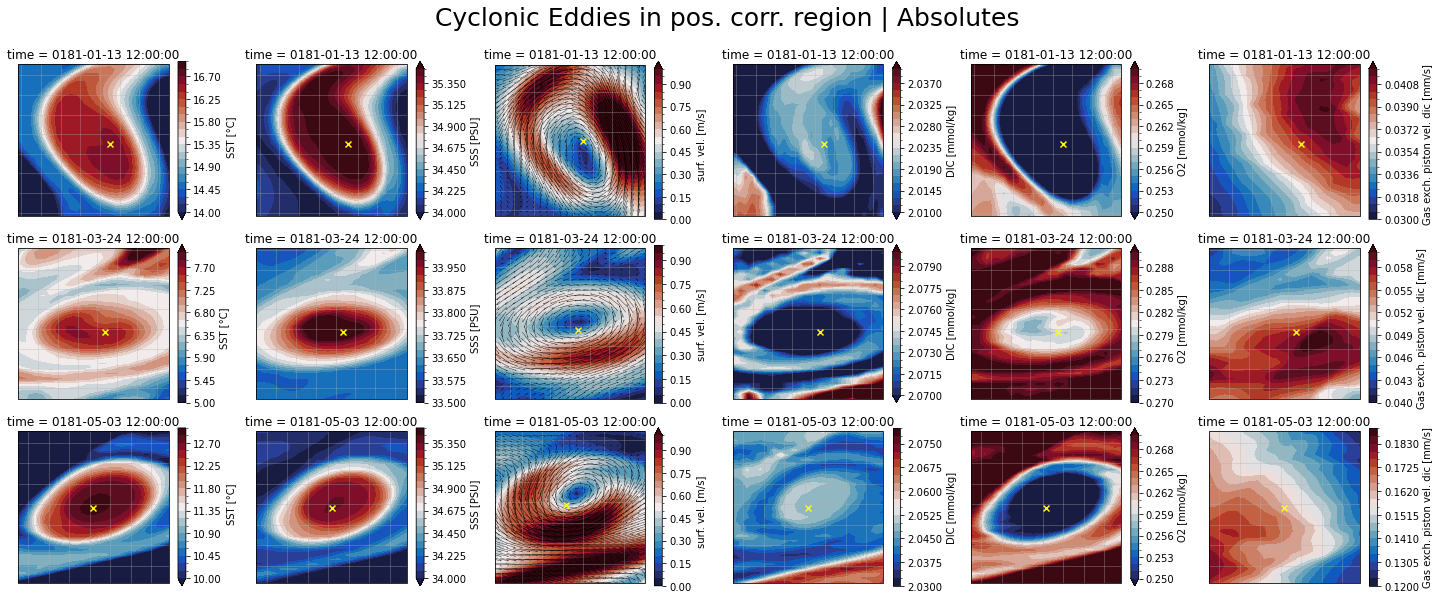

In [451]:
fig, axs=plt.subplots(nrows=3, ncols=6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,9))
axs=axs.flatten()
###SSH
abs1.surface_temp.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(14,17,21))
abs2.surface_temp.plot.contourf(ax=axs[6], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(5, 8,21))
abs3.surface_temp.plot.contourf(ax=axs[12], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(10, 13,21))

abs1.surface_salt.plot.contourf(ax=axs[1], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(34, 35.5,21))
abs2.surface_salt.plot.contourf(ax=axs[7], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.5,34,21))
abs3.surface_salt.plot.contourf(ax=axs[13], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(34, 35.5,21))

(np.sqrt(abs1.usurf**2+abs1.vsurf**2)).plot.contourf(ax=axs[2], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs2.usurf**2+abs2.vsurf**2)).plot.contourf(ax=axs[8], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs3.usurf**2+abs3.vsurf**2)).plot.contourf(ax=axs[14], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))

abs1.plot.quiver(ax=axs[2], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs2.plot.quiver(ax=axs[8], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs3.plot.quiver(ax=axs[14], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(), add_guide=False, scale=5)

(abs1.dic*1000).plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.01,2.04,21))
(abs2.dic*1000).plot.contourf(ax=axs[9], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.07,2.08,21))
(abs3.dic*1000).plot.contourf(ax=axs[15], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.03,2.08,21))

(abs1.o2*1000).plot.contourf(ax=axs[4], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,   levels=np.linspace(0.25,.27,21))
(abs2.o2*1000).plot.contourf(ax=axs[10], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.27, .29,21))
(abs3.o2*1000).plot.contourf(ax=axs[16], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(0.25,.27,21))

(abs1.kw*1000).plot.contourf(ax=axs[5], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.03,.042,21))
(abs2.kw*1000).plot.contourf(ax=axs[11], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance,levels=np.linspace(.04,.06,21))
(abs3.kw*1000).plot.contourf(ax=axs[17], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.12, 0.19,21))
for i in range(18):
    axs[i].gridlines(alpha=0.4)
    if i in [0,1,2,3,4,5]:
            axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [6,7,8,9,10,11]:
            axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [12,13,14,15,16,17]:
            axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
plt.suptitle('Cyclonic Eddies in pos. corr. region | Absolutes', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_cyc_abs.png', dpi=300)

In [476]:
dict1=dic.sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt1=temp.sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt1=salt.sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t1=o2.sel(xt_ocean=slice(-45.7, -43.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt1=v.sel(xu_ocean=slice(-45.7, -43.3)).sel(yu_ocean=center1.yt_ocean.values, method='nearest').isel(time=2).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict2=dic.sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=16).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
tempt2=temp.sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=16).sel(st_ocean=slice(0, 80)).drop_vars('yt_ocean')
saltt2=salt.sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=16).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
o2t2=o2.sel(xt_ocean=slice(-35.3, -33.3)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=16).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
vt2=v.sel(xu_ocean=slice(-35.3, -33.3)).sel(yu_ocean=center2.yt_ocean.values, method='nearest').isel(time=16).sel(st_ocean=slice(0,80)).drop_vars('yu_ocean')

dict3=dic.sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=24).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
tempt3=temp.sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=24).sel(st_ocean=slice(0, 80)).drop_vars('yt_ocean')
saltt3=salt.sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=24).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
o2t3=o2.sel(xt_ocean=slice(-44, -41.7)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=24).sel(st_ocean=slice(0,80)).drop_vars('yt_ocean')
vt3=v.sel(xu_ocean=slice(-44, -41.7)).sel(yu_ocean=center3.yt_ocean.values, method='nearest').isel(time=24).sel(st_ocean=slice(0,80)).drop_vars('yu_ocean')

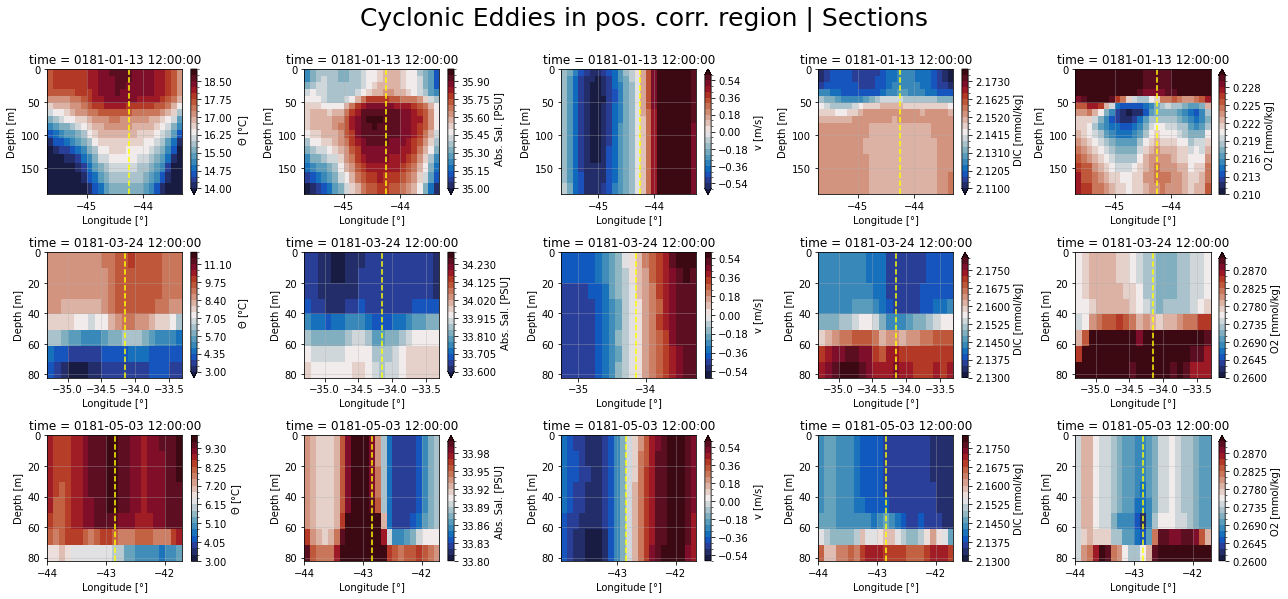

In [484]:
fig, axs=plt.subplots(nrows=3, ncols=5, figsize=(18,9))
axs=axs.flatten()

tempt1.plot(ax=axs[0], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(14,19,21), yincrease=False)
tempt2.plot(ax=axs[5], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(3,12,21), yincrease=False)
tempt3.plot(ax=axs[10],cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(3,10,21), yincrease=False)

saltt1.plot(ax=axs[1], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(35,36,21), yincrease=False)
saltt2.plot(ax=axs[6], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.6,34.3,21), yincrease=False)
saltt3.plot(ax=axs[11],cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.8,34,21), yincrease=False)

vt1.plot(ax=axs[2], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt2.plot(ax=axs[7], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt3.plot(ax=axs[12],cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance,levels=np.linspace(-.6,.6,21), yincrease=False)

(dict1*1000).plot(ax=axs[3] ,cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance,levels=np.linspace(2.11,2.18,21), yincrease=False)
(dict2*1000).plot(ax=axs[8] ,cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.13,2.18,21), yincrease=False)
(dict3*1000).plot(ax=axs[13],cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.13,2.18,21), yincrease=False)

                                                                                                                  
(o2t1*1000).plot(ax=axs[4], cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.21,.23,21), yincrease=False)
(o2t2*1000).plot(ax=axs[9], cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.26,.29,21), yincrease=False)
(o2t3*1000).plot(ax=axs[14],cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.26,.29,21), yincrease=False)
for i in range(15):
    axs[i].grid(alpha=0.4)
    axs[i].set_ylabel('Depth [m]')
    axs[i].set_xlabel('Longitude [°]')
    if i in [0,1,2,3,4]:
            axs[i].axvline(center1.xt_ocean,linestyle='--', c='yellow')
    if i in [5,6,7,8,9]:
            axs[i].axvline(center2.xt_ocean, linestyle='--', c='yellow')
    if i in [10,11,12,13,14]:
            axs[i].axvline(center3.xt_ocean, linestyle='--', c='yellow')
plt.suptitle('Cyclonic Eddies in pos. corr. region | Sections', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_cyc_section.png', dpi=300)

### anticyclonic eddies

In [510]:
reg1=red.isel(time=81).sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=slice(-49,-47.1))
reg2=red.isel(time=222).sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=slice(-49.8,-48))
reg3=red.isel(time=347).sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=slice(-49.2,-48))

In [511]:
center1=reg1.SSH.where(reg1.SSH==reg1.SSH.min(), drop=True)
center2=reg2.SSH.where(reg2.SSH==reg2.SSH.min(), drop=True)
center3=reg3.SSH.where(reg3.SSH==reg3.SSH.min(), drop=True)

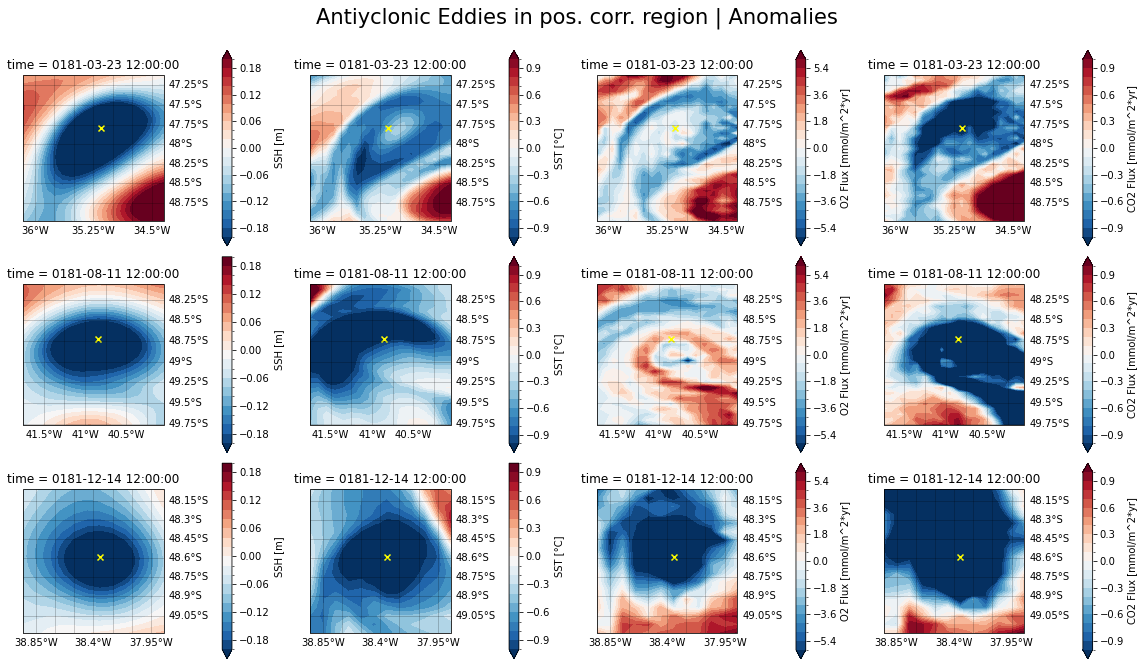

In [512]:

fig, axs=plt.subplots(nrows=3, ncols=4,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,10))
axs=axs.flatten()
###SSH
reg1.SSH.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg2.SSH.plot.contourf(ax=axs[4],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
reg3.SSH.plot.contourf(ax=axs[8],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SSH [m]"}, levels=np.linspace(-.2,.2,21))
###SST
reg1.SST.plot.contourf(ax=axs[1],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg2.SST.plot.contourf(ax=axs[5],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))
reg3.SST.plot.contourf(ax=axs[9],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "SST [°C]"}, levels=np.linspace(-1,1,21))

###O2
reg1.o2_stf.plot.contourf(ax=axs[2],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))
reg2.o2_stf.plot.contourf(ax=axs[6],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))
reg3.o2_stf.plot.contourf(ax=axs[10],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "O2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-6,6,21))

###CO2
reg1.dic_stf.plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1,1,21))
reg2.dic_stf.plot.contourf(ax=axs[7],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1,1,21))
reg3.dic_stf.plot.contourf(ax=axs[11],transform = ccrs.PlateCarree(),cbar_kwargs={'pad':0.25, 'label': "CO2 Flux [mmol/m^2*yr]"}, levels=np.linspace(-1,1,21))

for i in range(12):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
    gl.xlabels_top = False
    gl.ylabels_left = False
    if i in [0,1,2,3]:
        axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [4,5,6,7]:
        axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [8,9,10,11]:
        axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
    
plt.suptitle('Antiyclonic Eddies in pos. corr. region | Anomalies', fontsize=21, y=0.95);
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_acyc_anom.png', dpi=300);

In [513]:
abs1=ds.isel(time=81 ).sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=slice(-49,-47.1)).sel(xu_ocean=slice(-36.2, -34.3)).sel(yu_ocean=slice(-49,-47.1))
abs2=ds.isel(time=222).sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=slice(-49.8,-48)).sel(xu_ocean=slice(-41.8, -40)).sel(yu_ocean=slice(-49.8,-48))
abs3=ds.isel(time=347).sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=slice(-49.2,-48)).sel(xu_ocean=slice(-39, -37.8)).sel(yu_ocean=slice(-49.2,-48))

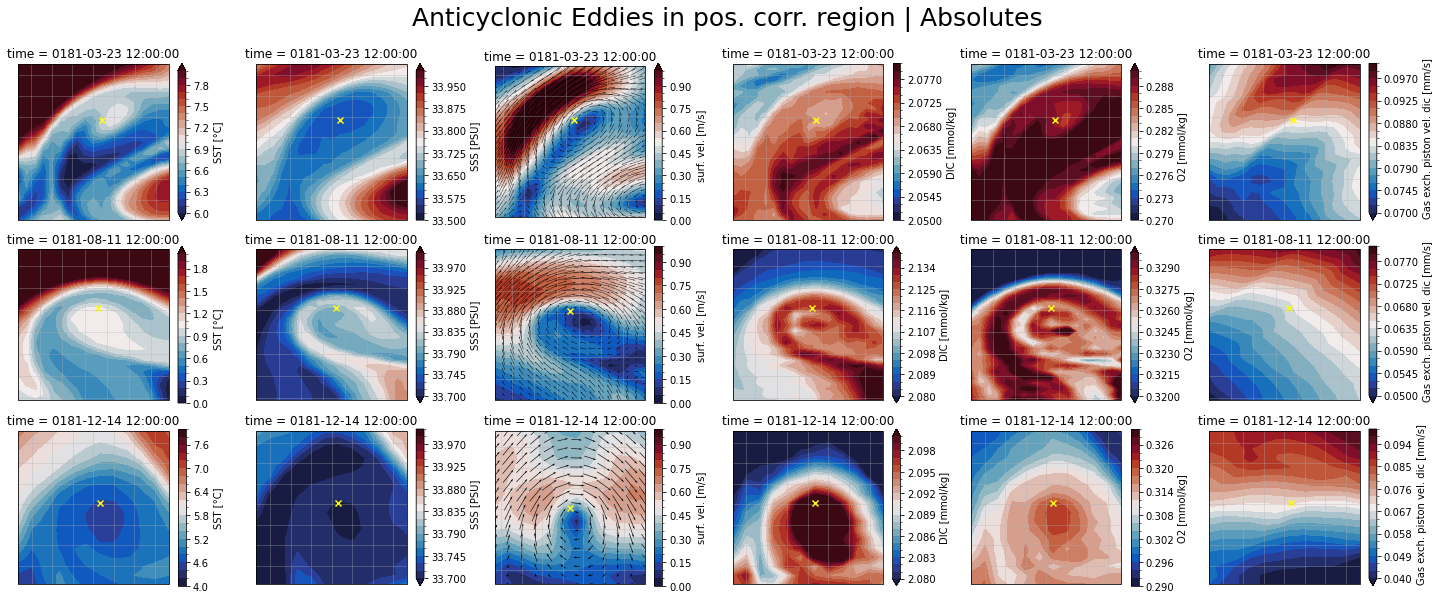

In [516]:
fig, axs=plt.subplots(nrows=3, ncols=6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,9))
axs=axs.flatten()
###SSH
abs1.surface_temp.plot.contourf(ax=axs[0], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(6,8,21))
abs2.surface_temp.plot.contourf(ax=axs[6], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(0,2,21))
abs3.surface_temp.plot.contourf(ax=axs[12], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"}, cmap=cmo.balance, levels=np.linspace(4,8,21))

abs1.surface_salt.plot.contourf(ax=axs[1], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.5,34,21))
abs2.surface_salt.plot.contourf(ax=axs[7], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.7,34,21))
abs3.surface_salt.plot.contourf(ax=axs[13], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SSS [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.7,34,21))

(np.sqrt(abs1.usurf**2+abs1.vsurf**2)).plot.contourf(ax=axs[2], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs2.usurf**2+abs2.vsurf**2)).plot.contourf(ax=axs[8], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance, levels=np.linspace(0,1,21))
(np.sqrt(abs3.usurf**2+abs3.vsurf**2)).plot.contourf(ax=axs[14], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "surf. vel. [m/s]"}, cmap=cmo.balance,levels=np.linspace(0,1,21))

abs1.plot.quiver(ax=axs[2], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs2.plot.quiver(ax=axs[8], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(),  add_guide=False, scale=5)
abs3.plot.quiver(ax=axs[14], x='xu_ocean', y='yu_ocean', u='usurf', v='vsurf', transform = ccrs.PlateCarree(), add_guide=False, scale=5)

(abs1.dic*1000).plot.contourf(ax=axs[3], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.05,2.08,21))
(abs2.dic*1000).plot.contourf(ax=axs[9], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.08,2.14,21))
(abs3.dic*1000).plot.contourf(ax=axs[15], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.08,2.1,21))

(abs1.o2*1000).plot.contourf(ax=axs[4], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,   levels=np.linspace(.27,.29, 21))
(abs2.o2*1000).plot.contourf(ax=axs[10], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.32,.33, 21))
(abs3.o2*1000).plot.contourf(ax=axs[16], transform = ccrs.PlateCarree(),cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.29,.33, 21))

(abs1.kw*1000).plot.contourf(ax=axs[5], transform = ccrs.PlateCarree(), cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(.07,.10,21))
(abs2.kw*1000).plot.contourf(ax=axs[11], transform = ccrs.PlateCarree(),cbar_kwargs={'label': "Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance,levels=np.linspace(.05,.08, 21))
(abs3.kw*1000).plot.contourf(ax=axs[17], transform = ccrs.PlateCarree(),cbar_kwargs={'label':"Gas exch. piston vel. dic [mm/s]"}, cmap=cmo.balance, levels=np.linspace(0.04,.1,21))
for i in range(18):
    axs[i].gridlines(alpha=0.4)
    if i in [0,1,2,3,4,5]:
            axs[i].scatter(center1.xt_ocean, center1.yt_ocean, marker='x', c='yellow')
    if i in [6,7,8,9,10,11]:
            axs[i].scatter(center2.xt_ocean, center2.yt_ocean, marker='x', c='yellow')
    if i in [12,13,14,15,16,17]:
            axs[i].scatter(center3.xt_ocean, center3.yt_ocean, marker='x', c='yellow')
plt.suptitle('Anticyclonic Eddies in pos. corr. region | Absolutes', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_acyc_abs.png', dpi=300)

In [522]:
dict1=dic.sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=4).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt1=temp.sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=4).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt1=salt.sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=4).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t1=o2.sel(xt_ocean=slice(-36.2, -34.3)).sel(yt_ocean=center1.yt_ocean.values, method='nearest').isel(time=4).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt1=v.sel(xu_ocean=slice(-36.2, -34.3)).sel(yu_ocean=center1.yt_ocean.values, method='nearest').isel(time=4).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict2=dic.sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt2=temp.sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt2=salt.sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t2=o2.sel(xt_ocean=slice(-41.8, -40)).sel(yt_ocean=center2.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt2=v.sel(xu_ocean=slice(-41.8, -40)).sel(yu_ocean=center2.yt_ocean.values, method='nearest').isel(time=44).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

dict3=dic.sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=69).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
tempt3=temp.sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=69).sel(st_ocean=slice(0, 200)).drop_vars('yt_ocean')
saltt3=salt.sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=69).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
o2t3=o2.sel(xt_ocean=slice(-39, -37.8)).sel(yt_ocean=center3.yt_ocean.values, method='nearest').isel(time=69).sel(st_ocean=slice(0,200)).drop_vars('yt_ocean')
vt3=v.sel(xu_ocean=slice(-39, -37.8)).sel(yu_ocean=center3.yt_ocean.values, method='nearest').isel(time=69).sel(st_ocean=slice(0,200)).drop_vars('yu_ocean')

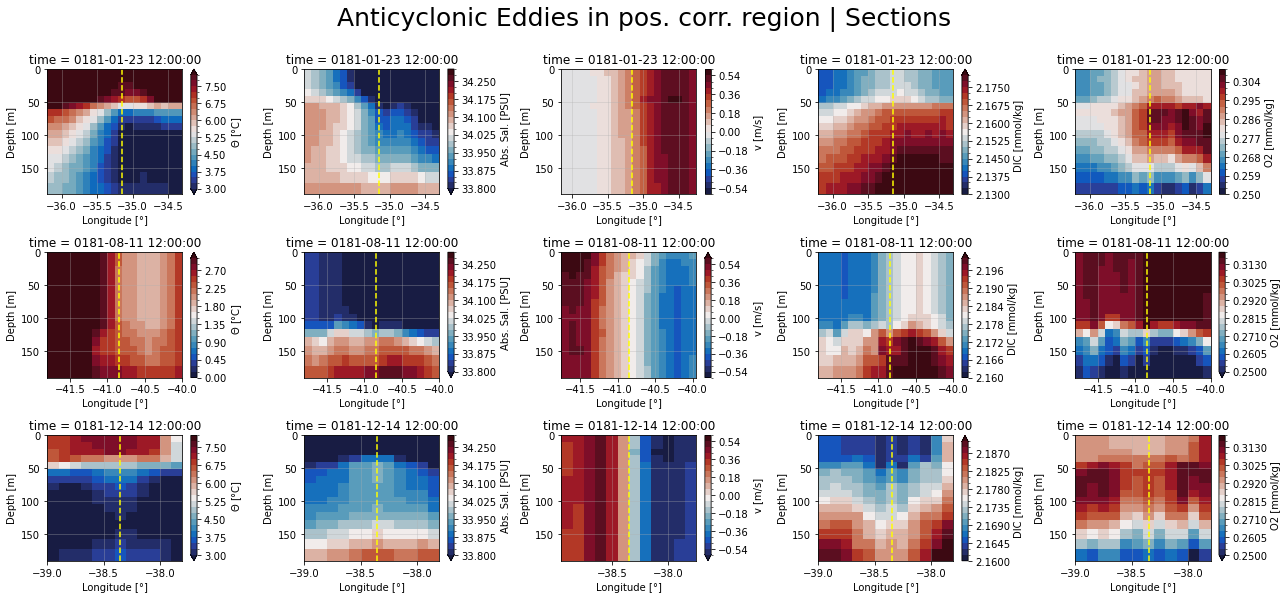

In [527]:
fig, axs=plt.subplots(nrows=3, ncols=5, figsize=(18,9))
axs=axs.flatten()

tempt1.plot(ax=axs[0], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(3,8,21), yincrease=False)
tempt2.plot(ax=axs[5], cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(0, 3,21), yincrease=False)
tempt3.plot(ax=axs[10],cbar_kwargs={'label': "$\Theta$ [°C]"}, cmap=cmo.balance, levels=np.linspace(3,8,21), yincrease=False)

saltt1.plot(ax=axs[1], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.8,34.3,21), yincrease=False)
saltt2.plot(ax=axs[6], cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.8,34.3,21), yincrease=False)
saltt3.plot(ax=axs[11],cbar_kwargs={'label': "Abs. Sal. [PSU]"}, cmap=cmo.balance, levels=np.linspace(33.8,34.3,21), yincrease=False)

vt1.plot(ax=axs[2], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt2.plot(ax=axs[7], cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance, levels=np.linspace(-.6,.6,21), yincrease=False)
vt3.plot(ax=axs[12],cbar_kwargs={'label': "v [m/s]"}, cmap=cmo.balance,levels=np.linspace(-.6,.6,21), yincrease=False)

(dict1*1000).plot(ax=axs[3] ,cbar_kwargs={ 'label': "DIC [mmol/kg]"}, cmap=cmo.balance,levels=np.linspace(2.13,2.18,21), yincrease=False)
(dict2*1000).plot(ax=axs[8] ,cbar_kwargs={'label': "DIC [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(2.16,2.2,21), yincrease=False)
(dict3*1000).plot(ax=axs[13],cbar_kwargs={'label':"DIC [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(2.16,2.19,21), yincrease=False)

                                                                                                                  
(o2t1*1000).plot(ax=axs[4], cbar_kwargs={'label': "O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.25,.31,21), yincrease=False)
(o2t2*1000).plot(ax=axs[9], cbar_kwargs={ 'label': "O2 [mmol/kg]"}, cmap=cmo.balance, levels=np.linspace(.25,.32,21), yincrease=False)
(o2t3*1000).plot(ax=axs[14],cbar_kwargs={ 'label':"O2 [mmol/kg]"}, cmap=cmo.balance,  levels=np.linspace(.25,.32,21), yincrease=False)
for i in range(15):
    axs[i].grid(alpha=0.4)
    axs[i].set_ylabel('Depth [m]')
    axs[i].set_xlabel('Longitude [°]')
    if i in [0,1,2,3,4]:
            axs[i].axvline(center1.xt_ocean,linestyle='--', c='yellow')
    if i in [5,6,7,8,9]:
            axs[i].axvline(center2.xt_ocean, linestyle='--', c='yellow')
    if i in [10,11,12,13,14]:
            axs[i].axvline(center3.xt_ocean, linestyle='--', c='yellow')
plt.suptitle('Anticyclonic Eddies in pos. corr. region | Sections', fontsize=25, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(savepath+'poscorr_acyc_section.png', dpi=300)

### two eddies next to each other

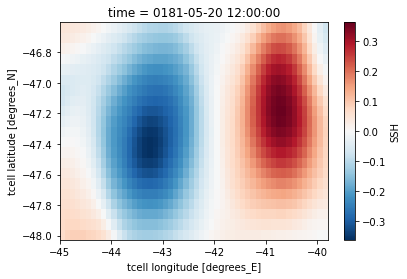

In [245]:
red.SSH.isel(time=139).sel(xt_ocean=slice(-45, -39.8)).sel(yt_ocean=slice(-48,-46.6)).plot()